In [1]:
import numpy as np
import numpy.linalg as la # matrix rank, inverse
import numpy.random as rnd # generate noise in simulated data
import matplotlib.pyplot as plt # plots
from mpl_toolkits.mplot3d import Axes3D

Q4 Design classifier to detect if a face image is smiling.

In [2]:
##### 4. Design classifier to detect if a face image is smiling. #####

##### Part a #####
print("a)")
# Load in training data and labels
# File available on Canvas
face_data_dict = np.load("face_emotion_data.npz")
face_features = face_data_dict["X"]
face_labels = face_data_dict["y"]
n, p = face_features.shape

X = face_features
y = face_labels
# Solve the least-squares solution. weights is the array of weight coefficients
# find weights
weights = la.inv(X.T@X)@X.T@y
print(f"Part 4a. Found weights:\n{weights}")


a)
Part 4a. Found weights:
[[ 0.94366942]
 [ 0.21373778]
 [ 0.26641775]
 [-0.39221373]
 [-0.00538552]
 [-0.01764687]
 [-0.16632809]
 [-0.0822838 ]
 [-0.16644364]]


b) Suppose you have a new face image. The face features of this image is stored in $x = [x_1, \dots, x_9]$.
<br> If $x^T$@weights $> 0$, we give the image the label +1; if $x^T$@weights $< 0$, we give the image the label -1;
<br> if $x^T$@weights $= 0$, the image is on the decision boundary.

In [3]:
##### Part c #####
print("c)")
def lstsq_cv_err(features: np.ndarray, labels: np.ndarray, 
                 subset_count: int=8) -> float:

    """Estimate the error of a least-squares classifier 
        using cross-validation. Use subset_count different 
        train/test splits with each subset acting as the 
        holdout set once.

    Parameters:
        features (np.ndarray): dataset features as a 2D
            array with shape (sample_count , feature_count)
        labels (np.ndarray): dataset class labels (+1/-1) 
            as a 1D array with length (sample_count)
        subset_count (int): number of subsets to divide
            the dataset into
        Note: assumes that subset_count divides the
            dataset evenly
    Returns:
        cls_err (float): estaimted classification error
        rate of least-squares method
    """
    sample_count , feature_count = features.shape
    subset_size = sample_count // subset_count
    # Reshape arrays for easier subset-level manipulation
    features = features.reshape(subset_count , subset_size ,feature_count)
    labels = labels.reshape(subset_count , subset_size)
    subset_idcs = np.arange(subset_count)
    train_set_size = (subset_count - 1) * subset_size
    subset_err_counts = np.zeros(subset_count)

    for i in range(subset_count):
        # select relevant dataset ,
        # fit and evaluate a linear model,
        # then store errors in subset_err_counts[i]
        X = np.vstack((features[:i], features[i+1:]))
        X = X.reshape(train_set_size, feature_count)
        y = np.vstack((labels[:i], labels[i+1:]))
        y = y.reshape(train_set_size, 1)

        w_hat = la.inv(X.T@X)@X.T@y
        X_hold_out = features[i].reshape(subset_size, feature_count)
        y_hat = X_hold_out@w_hat
        for j in range(subset_size):
            if y_hat[j][0] <= 0 and labels[i][j] == 1:
                subset_err_counts[i] += 1
            if y_hat[j][0] >= 0 and labels[i][j] == -1:
                subset_err_counts[i] += 1

    # Average over the entire dataset to find the classification error
    cls_err = np.sum(subset_err_counts) / (subset_count* subset_size)
    return cls_err
    # Run on the dataset with all features included
full_feat_cv_err = lstsq_cv_err(face_features , face_labels)
print(f"Error estimate: {full_feat_cv_err*100:.3f}%")


c)
Error estimate: 4.688%


d) We can sort the indices of weights based on the values in weights in descending order. By part e,
<br> in order to keep the cross-validation error rate below 6%, we keep feature 0, 1, 2, 3, 8.

In [9]:
##### Part e #####
Xc = face_features
wc = weights

weight_names = np.arange(9)

for i in range(p):
    min_weight_idx = np.argmin(abs(weights))
    wc = np.delete(wc, min_weight_idx)
    Xc = np.delete(Xc, min_weight_idx, axis=1)
    weight_names = np.delete(weight_names, min_weight_idx)

    full_feat_cv_err = lstsq_cv_err(Xc, face_labels)

    print(f"Weights remaining: {weight_names}. \
          Error estimate: {full_feat_cv_err*100:.3f}%")
    if(full_feat_cv_err > 0.06):
        break

Weights remaining: [0 1 2 3 5 6 7 8].           Error estimate: 4.688%
Weights remaining: [0 1 2 3 6 7 8].           Error estimate: 4.688%
Weights remaining: [0 1 2 3 7 8].           Error estimate: 3.906%
Weights remaining: [0 1 2 3 8].           Error estimate: 5.469%
Weights remaining: [0 1 2 3].           Error estimate: 7.031%


Q5 Polynomial fitting.

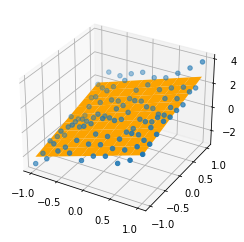

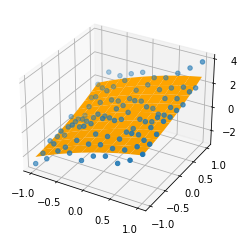

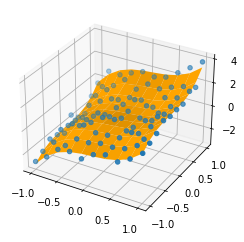

In [10]:
##### 5. Polynomial fitting. #####

# File available on Canvas
data = np.load('polydata_2D.npz')
x1 = np.ravel(data ['x1'])
x2 = np.ravel(data ['x2'])
y = data['y']

N = x1.size
p = np.zeros((3 , N))

for d in [1,2,3]:
    # Generate the X matrix for this d

    # Find the least-squares weight matrix w_d

    # Evaluate the best-fit polynomial at each point (x1,×2)
    # and store the result in the corresponding column of p
    X = np.zeros((N, 2*d+1))
    features_indices = list(range(2*d+1))
    for row in range(N):
        for col in features_indices:
            if col < d+1:
                X[row][col] = x1[row] ** col
            else:
                X[row][col] = x2[row] ** (col-d)
    
    w_hat = la.inv(X.T@X)@X.T@y

    y_hat = X@w_hat

    p[d-1] = y_hat
                
# Plot the degree 1 surface
Z1 = p[0,:].reshape(data['x1'].shape)
ax = plt.axes (projection='3d')
ax.scatter (data['x1'], data['x2'], y)
ax.plot_surface (data['x1'], data['x2'], Z1, color='orange')
plt.show()

# Plot the degree 2 surface
Z2 = p[1,:].reshape(data['x1'].shape)
ax = plt.axes (projection='3d')
ax.scatter(data['x1'], data['x2'],y)
ax.plot_surface(data['x1'], data['x2'], Z2, color='orange')
plt.show()

# Plot the degree 3 surface
Z3 = p[2,:].reshape(data['x1'].shape)
ax = plt.axes(projection='3d')
ax.scatter(data['x1'], data['x2'],y)
ax.plot_surface(data['x1'], data['x2'], Z3, color='orange')
plt.show()